## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
X = np.array([
      [0, 0],
      [0, 1],
      [1, 0],
      [1, 1],
  ])

Y = np.array([
                  1,
                  0,
                  0,
                  1
                ])

## Implementation

In [3]:
class FFNN:
  def __init__(self, n_input, n_output , h = [2]):
    self.nx = n_input
    self.ny = n_output
    self.nh = len(h)
    self.lens = [self.nx] + h + [self.ny]
    self.fake_input = np.array([[1]])

    self.W = {}
    for i in range(1, self.nh + 2):
      self.W[i] = np.random.randn(self.lens[i-1] + 1, self.lens[i])
  
  def sigmoid(self, z):
    return 1.0/(1.0 + np.exp(-z))
  
  def loss(self,label,pred):
    return np.square(label - pred).sum() / 2
  
  def sigder(self, x):
    return x*(1 - x)  
  
  def forward(self, x):
    self.A = {}
    self.Z = {}
    self.Z[0] = np.resize(x, (len(x), 1))
    for i in range(1, self.nh + 2):
      self.Z[i-1] = np.vstack((self.fake_input, self.Z[i-1]))
      self.A[i] = np.matmul( self.W[i].T, self.Z[i-1] ) 
      self.Z[i] = self.sigmoid(self.A[i])
    
    self.Z[self.nh + 1] = self.sigmoid(self.A[self.nh+1])
    
    return self.Z[self.nh + 1]

  def grad(self, train_x, train_y):
    self.forward(train_x) 
    self.dell = {}  
    self.dW = {}
    
    self.dell[self.nh + 1] = self.Z[self.nh + 1] - train_y 
    self.dW[self.nh + 1] = np.matmul(self.Z[self.nh], self.dell[self.nh + 1].T) 

    for i in range(self.nh, 0, -1): 
      tmp = np.matmul(self.W[i+1][1:,:], self.dell[i+1])
      self.dell[i] =  tmp * self.sigder(self.Z[i][1:])
      self.dW[i] =  np.matmul(self.Z[i - 1], self.dell[i].T)

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

  def fit(self, X, Y, epochs=10, learning_rate=0.01, display_loss=False):      

    if display_loss:
      loss = {}
    
    for epoch in range(epochs):
      if epoch%10 == 0:
        print("epoch: "+str(epoch) +" running.......")
      dW = {}
      for i in range(1, self.nh+2):
        dW[i] = np.zeros((1 + self.lens[i-1], self.lens[i]))
      for x, y in zip(X, Y):
        self.grad(np.asarray(x).T, np.asarray(y))
        for i in range(1, self.nh+2):
          self.W[i] -= learning_rate * self.dW[i] 
  
      if display_loss:
        Y_pred = self.predict(X)
        loss[epoch] = self.loss(Y, Y_pred)
        
    if display_loss:
      lists = sorted(loss.items())
      x, y = zip(*lists)
      plt.plot(x, y, 'r', label = 'Training error')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend(loc="upper left")
      plt.show()

def accuracy_score(Y_a, Y_t):
  Y_a = (Y_a >= 0.5)*1
  return np.mean( Y_t == Y_a)

epoch: 0 running.......
epoch: 10 running.......
epoch: 20 running.......
epoch: 30 running.......
epoch: 40 running.......
epoch: 50 running.......
epoch: 60 running.......
epoch: 70 running.......
epoch: 80 running.......
epoch: 90 running.......
epoch: 100 running.......
epoch: 110 running.......
epoch: 120 running.......
epoch: 130 running.......
epoch: 140 running.......
epoch: 150 running.......
epoch: 160 running.......
epoch: 170 running.......
epoch: 180 running.......
epoch: 190 running.......


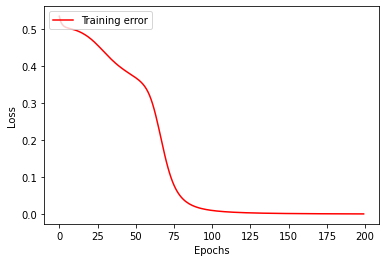

Accuracy : 100.0%


In [4]:
ffsn_multi = FFNN(2,1,[3])
X_train = X_val = X
Y_train = Y_val = Y
ffsn_multi.fit(X_train,Y_train, epochs=200, learning_rate=1, display_loss=True)

Y_pred_train = ffsn_multi.predict(X_train)
accuracy_train = accuracy_score(Y_pred_train, Y_train)
print(f"Accuracy : {round(accuracy_train*100, 4)}%")

In [6]:
print("Learning Weights:")
print(ffsn_multi.W)

Learning Weights:
{1: array([[-2.01332862, -3.57299734, -3.00320181],
       [-2.66797819, -6.62405415,  5.54610782],
       [ 1.53429601,  6.39263197, -5.94144192]]), 2: array([[ 4.52517064],
       [-0.62786608],
       [-8.98888394],
       [-9.20290478]])}
